Created: 22/10/2020, Ryan Corbyn 

This is a script to analyse the noise data recorded from the AO STED microscope. 

The script will pull in individual data files from the idrive and save data in a list. 

The data will be adjusted so that the line scans will be stitched together to give 1 continuous data stream. A timing array will also be created. 

An FFT of the dataset will then be made and the results plotted in matplotlib. 

The plot is then saved. 

NOTE

In [1]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plot 

In [2]:
def get_data(data_file):
    # Extract data from data file
    data_set_array = np.loadtxt(data_file)
    data_set = []
    for i in range(len(data_set_array)):
        data_set.extend(data_set_array[i, 1:len(data_set_array[i])])
    
    return(data_set)

In [3]:
def get_params(params_file):
    # Extract parameters form data file 
    params_array = pd.read_table(params_file, names = ['Parameter', 'Value'])
    
    return(params_array)

In [6]:
folder_directory = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data\\Microscope Noise\\'
date = '20201026'
file_name = '20201026_NoiseScan_1500' 

data = get_data(folder_directory + date + '\\' + file_name + '.dat')
#Params = get_params(folder_directory + date + '\\' + file_name + 'Params.dat')
dwell_time = 0.01#params['Value'][3]*10**(-6) # get dwell time in milliseconds. 
time = np.linspace(0.001, len(data)*dwell_time, len(data)) # create time array

fourierTransform = np.fft.fft(data)/len(data)  # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(data)/2))] # Exclude sampling frequency

frequency = np.fft.fftfreq(int(len(data)/2), d=dwell_time)

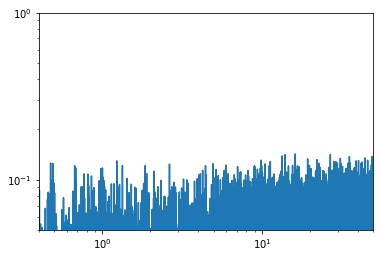

In [10]:
data_fft = fourierTransform.real
fig, ax = plot.subplots()
ax.plot(frequency, data_fft)
ax.set_ylim(0.05,1)
ax.set_xlim(0.4,50)#1/(time[1]))
ax.set_yscale('log')
ax.set_xscale('log')

In [139]:
print(len(data_fft))

3028
